
# Importing required python libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,recall_score,precision_score
import os
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point
from scipy import stats
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from statsmodels.graphics.tsaplots import plot_acf

# Data Loading

In [3]:
# Loading data from csv file and converting it into a DataFrame
df=pd.read_csv("./data/drought_soil.csv")

# Data Preprocessing

Score Count 
0    215117
1     73120
2     52771
3     41914
4     26069
5     11401
Name: score, dtype: int64
                     


<Axes: xlabel='score', ylabel='count'>

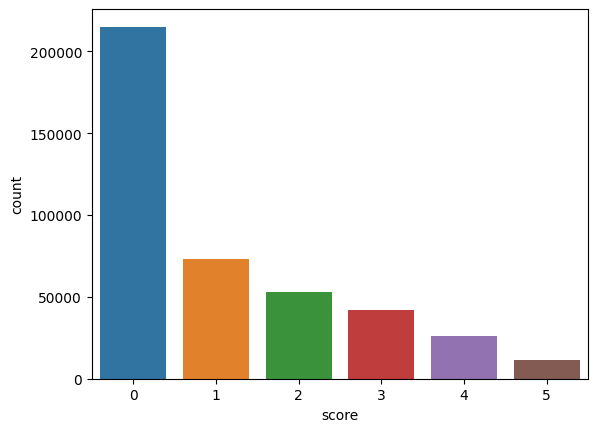

In [5]:
# Dropping the nan values which results in weekly data
df=df.drop(['Unnamed: 0'],axis=1)
df=df.dropna(axis=0)

# Function to categorise the scores of drought
def nn(x):
    if(x>=0 and x<=0.5):
        return 0
    elif(x>0.5 and x<=1.5):
        return 1
    elif(x>1.5 and x<=2.5):
        return 2
    elif(x>2.5 and x<=3.5):
        return 3
    elif(x>3.5 and x<=4.5):
        return 4
    elif(x>4.5 and x<=5.5):
        return 5
    else:
        return x

# Applying the above function for score column
df['score']=df['score'].apply(nn)

# Count of scores for each category
print("Score Count ")
print(df.score.value_counts())
print("                     ")

# Bar graph to visualise the scores of each category
sns.countplot(df,x=df.score)




# Exploratory Data Analysis

In [ ]:
# Descriptive statistics
display(df.describe()) # For numeric columns

display(df.describe(include=['object'])) # For Categorical columns

print("\nSkewness: \n", df.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", df.kurtosis(axis = 0, skipna = True))

X_st=df.drop(['score','date'],axis=1)
y_st=df[['score']]

X_st = sm.add_constant(X_st)  # Adding a constant term for intercept
model = sm.OLS(y_st, X_st).fit()

print(model.summary())



,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_RANGE,TS,WS10M,...,lon,elevation,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND
count,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,...,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000,420392.000000
mean,8064.778209,2.909893,96.126434,8.978595,16.016094,9.310897,9.342821,11.823534,16.058596,2.795982,...,-93.434877,490.144468,1.303667,2.365500,3.167614,16.596429,54.132982,13.926598,6.823436,20.750034
std,4233.259601,6.933049,8.187395,4.918701,9.639977,9.936818,9.885141,4.049105,9.969368,1.352749,...,13.411346,775.983491,5.734411,8.740626,11.476246,20.604333,33.370671,20.449311,16.283658,27.591368
min,1001.000000,0.000000,66.490000,0.350000,-29.920000,-30.040000,-30.000000,0.410000,-30.010000,0.430000,...,-123.980998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5073.000000,0.000000,96.880000,4.750000,9.280000,1.880000,1.910000,9.010000,9.100000,1.840000,...,-104.331872,58.000000,0.000000,0.000000,0.085444,7.698151,21.265400,0.000000,0.043253,0.274566
50%,8041.000000,0.150000,99.690000,8.100000,17.300000,10.160000,10.170000,11.830000,17.360000,2.470000,...,-87.168429,140.000000,0.000000,0.000000,0.417000,8.919858,62.597633,3.188647,0.400254,6.420078
75%,12129.000000,2.430000,100.970000,12.910000,24.230000,17.880000,17.880000,14.690000,24.500000,3.430000,...,-83.588971,393.000000,0.000000,0.000000,1.105200,14.638479,86.564980,21.668852,3.382327,32.984863
max,13235.000000,134.770000,103.710000,21.740000,39.330000,26.540000,26.540000,28.300000,42.480000,15.730000,...,-71.990702,3561.000000,53.686298,78.871132,99.955193,97.197968,91.044609,80.104858,99.956841,99.956841


,date
count,420392
unique,887
top,2000-01-04
freq,474



Skewness: 
 fips          -0.197797
PRECTOT        4.814414
PS            -1.805388
QV2M           0.389860
T2M           -0.555098
T2MDEW        -0.386738
T2MWET        -0.373123
T2M_RANGE      0.014128
TS            -0.563934
WS10M          1.510670
WS10M_RANGE    1.683696
WS50M          1.053781
WS50M_RANGE    1.408354
score          1.106522
lat            0.098726
lon           -0.952348
elevation      2.063074
WAT_LAND       6.089426
NVG_LAND       5.899818
URB_LAND       5.989657
GRS_LAND       2.486070
FOR_LAND      -0.395147
CULTRF_LAND    1.536345
CULTIR_LAND    3.283938
CULT_LAND      1.292866
dtype: float64

Kurtosis: 
 fips           -1.260965
PRECTOT        35.042038
PS              2.039739
QV2M           -1.010276
T2M            -0.328593
T2MDEW         -0.750024
T2MWET         -0.777684
T2M_RANGE      -0.341666
TS             -0.223442
WS10M           3.570845
WS10M_RANGE     4.321723
WS50M           1.882887
WS50M_RANGE     3.529695
score           0.121455
lat      

# Univariate Analysis

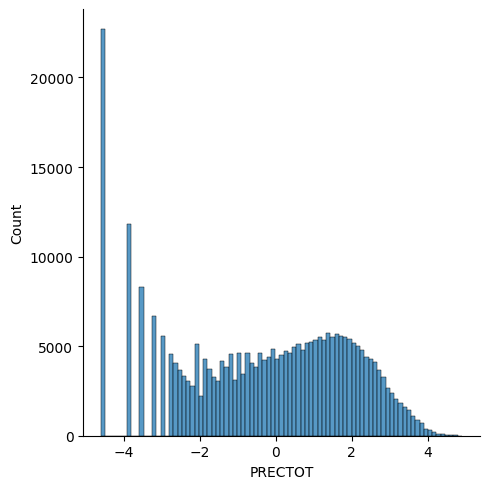

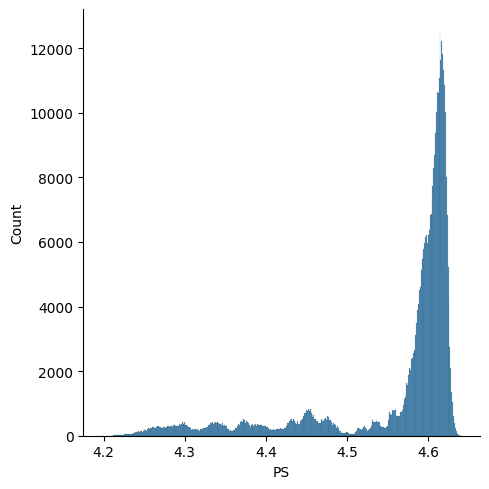

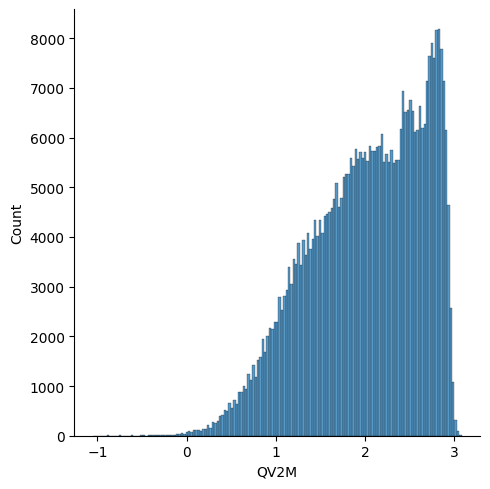

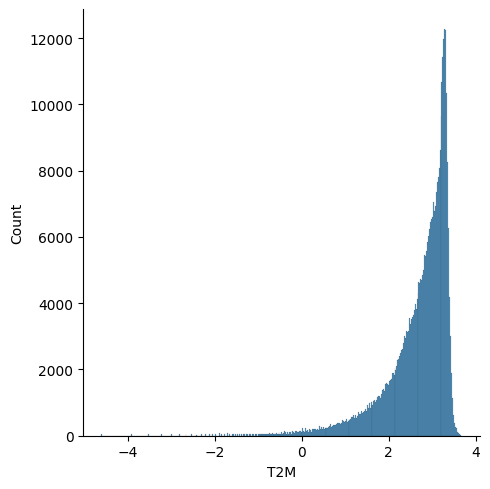

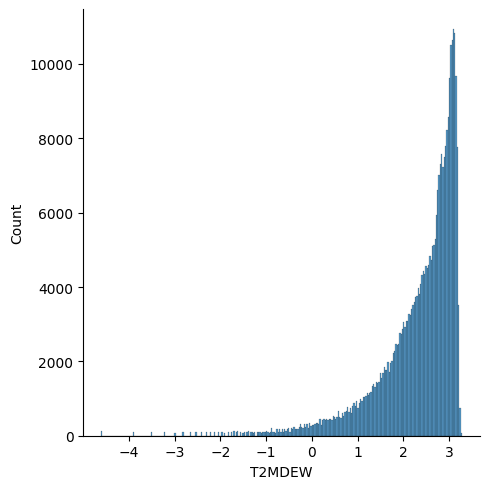

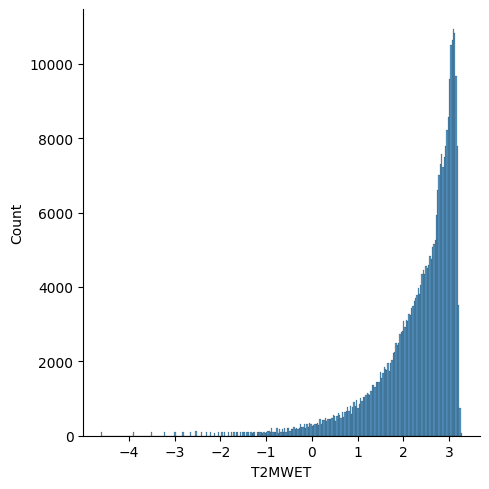

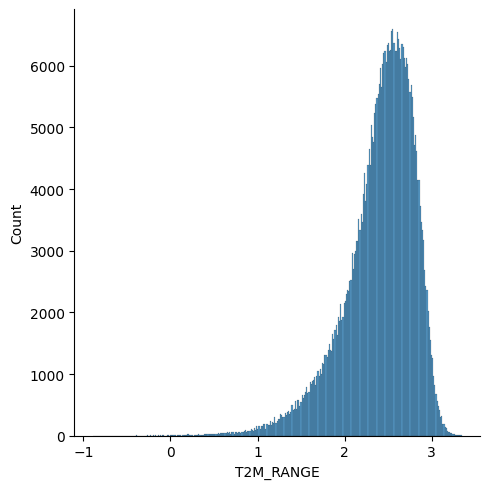

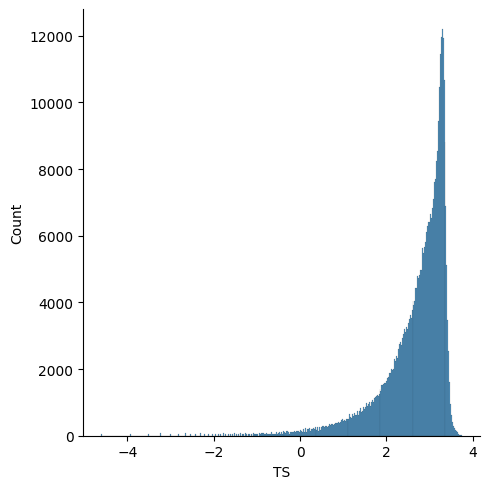

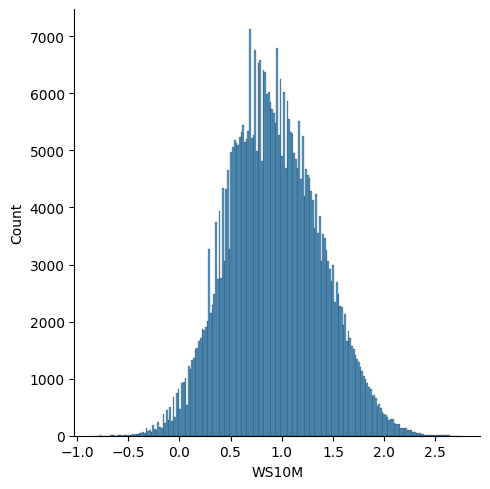

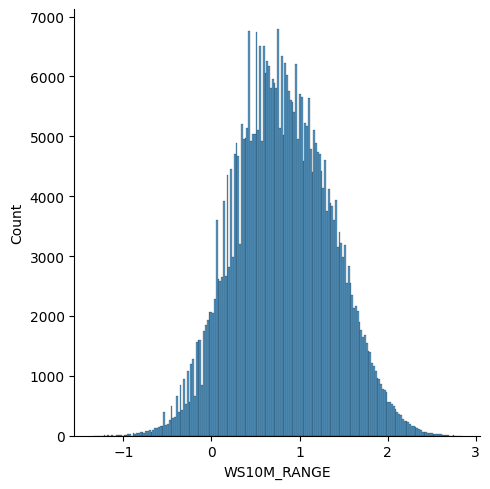

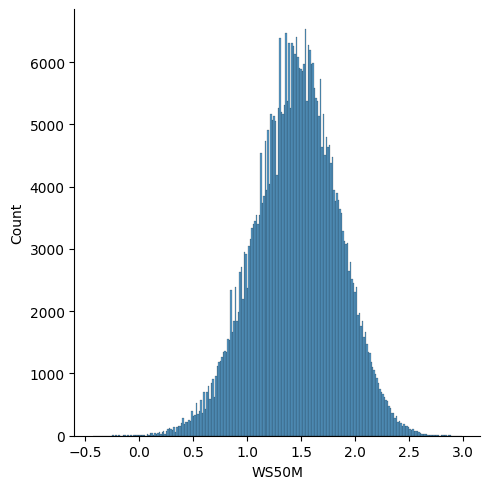

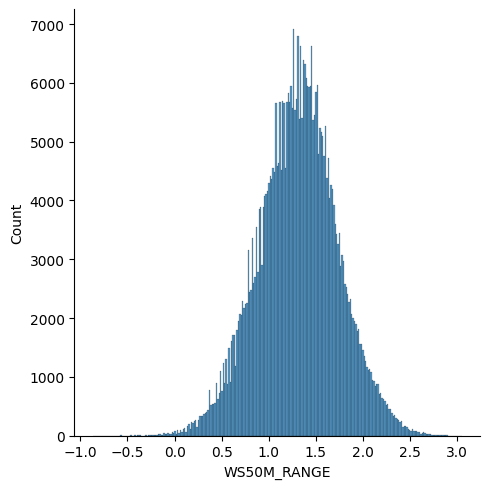

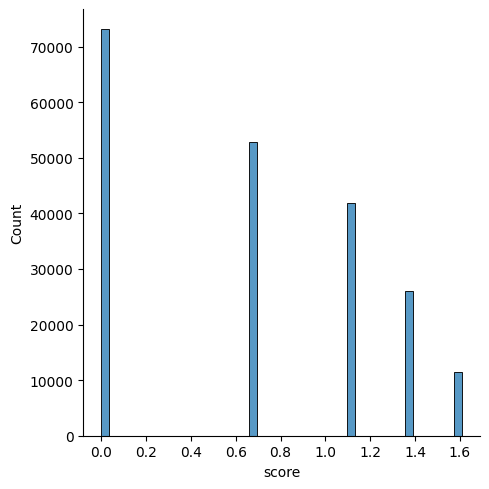

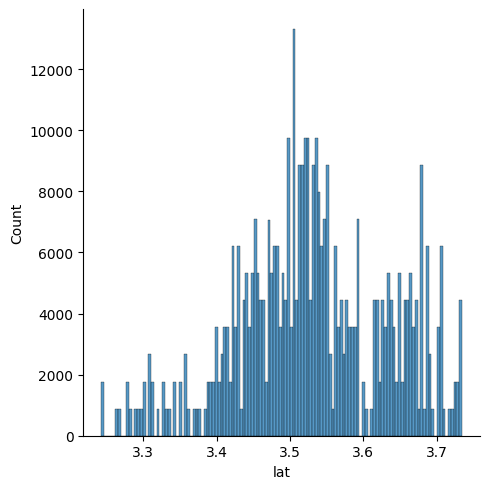

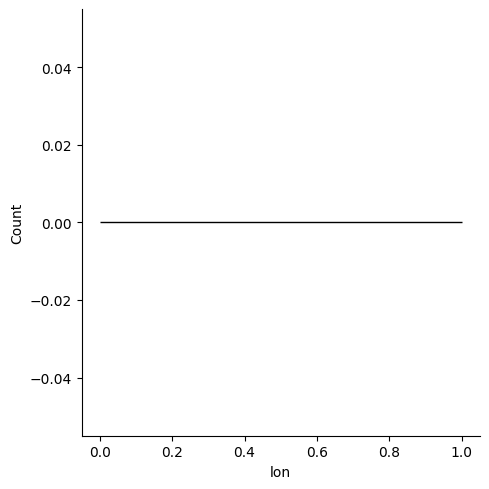

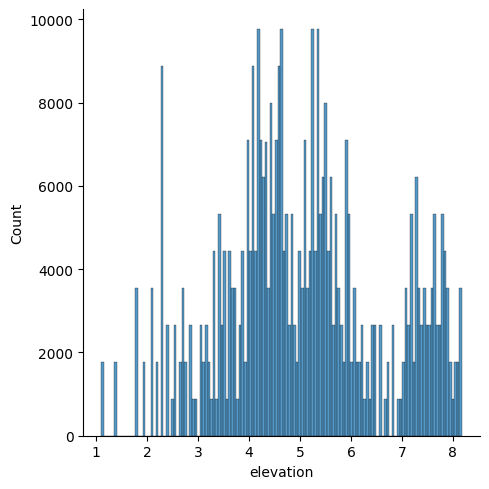

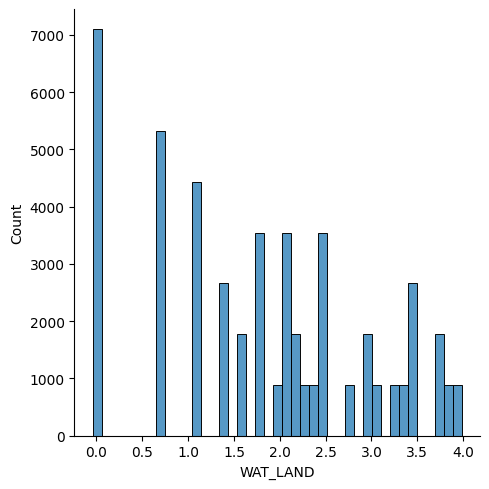

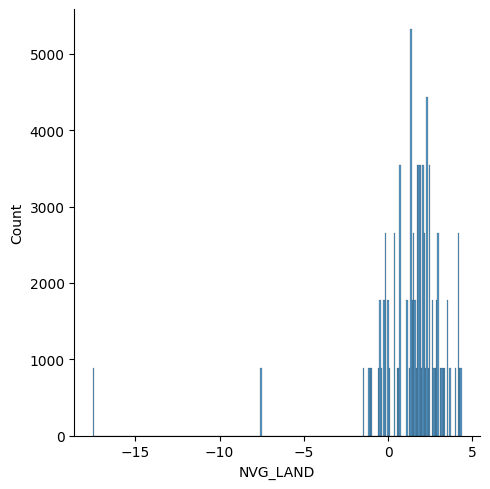

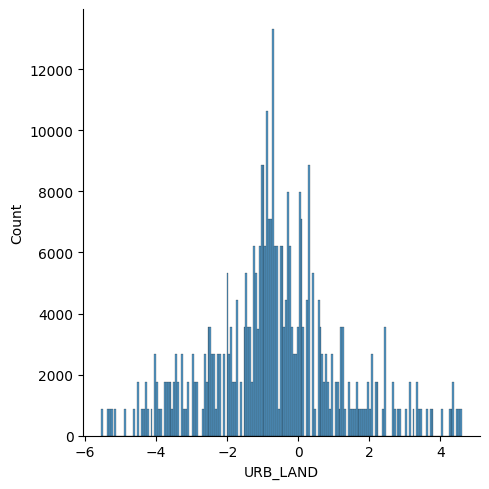

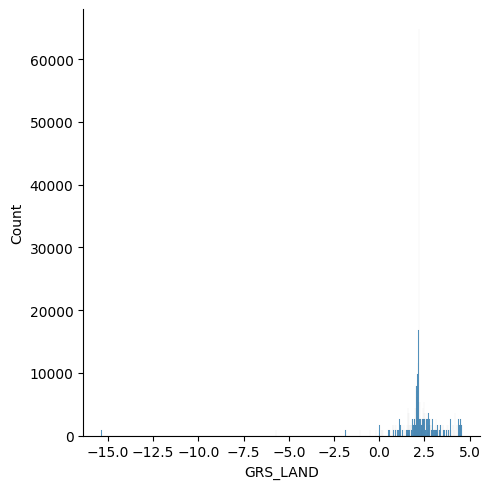

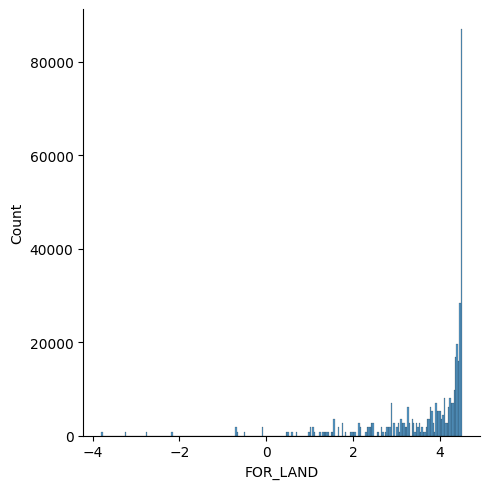

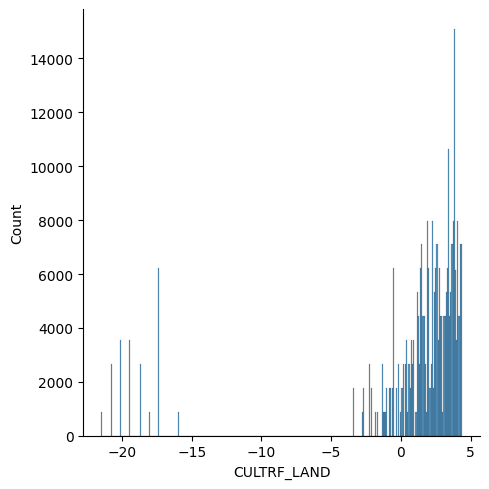

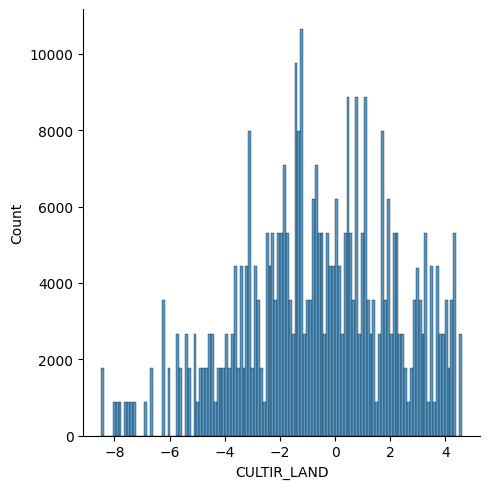

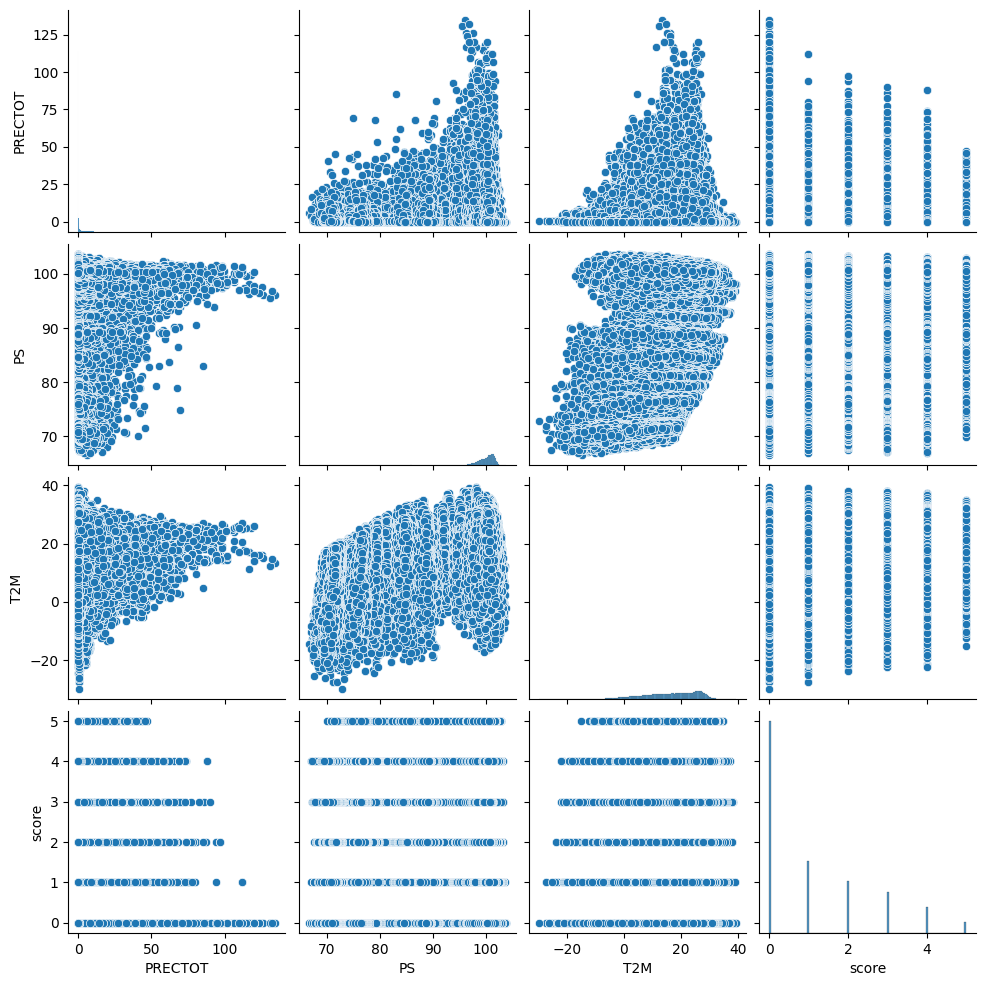

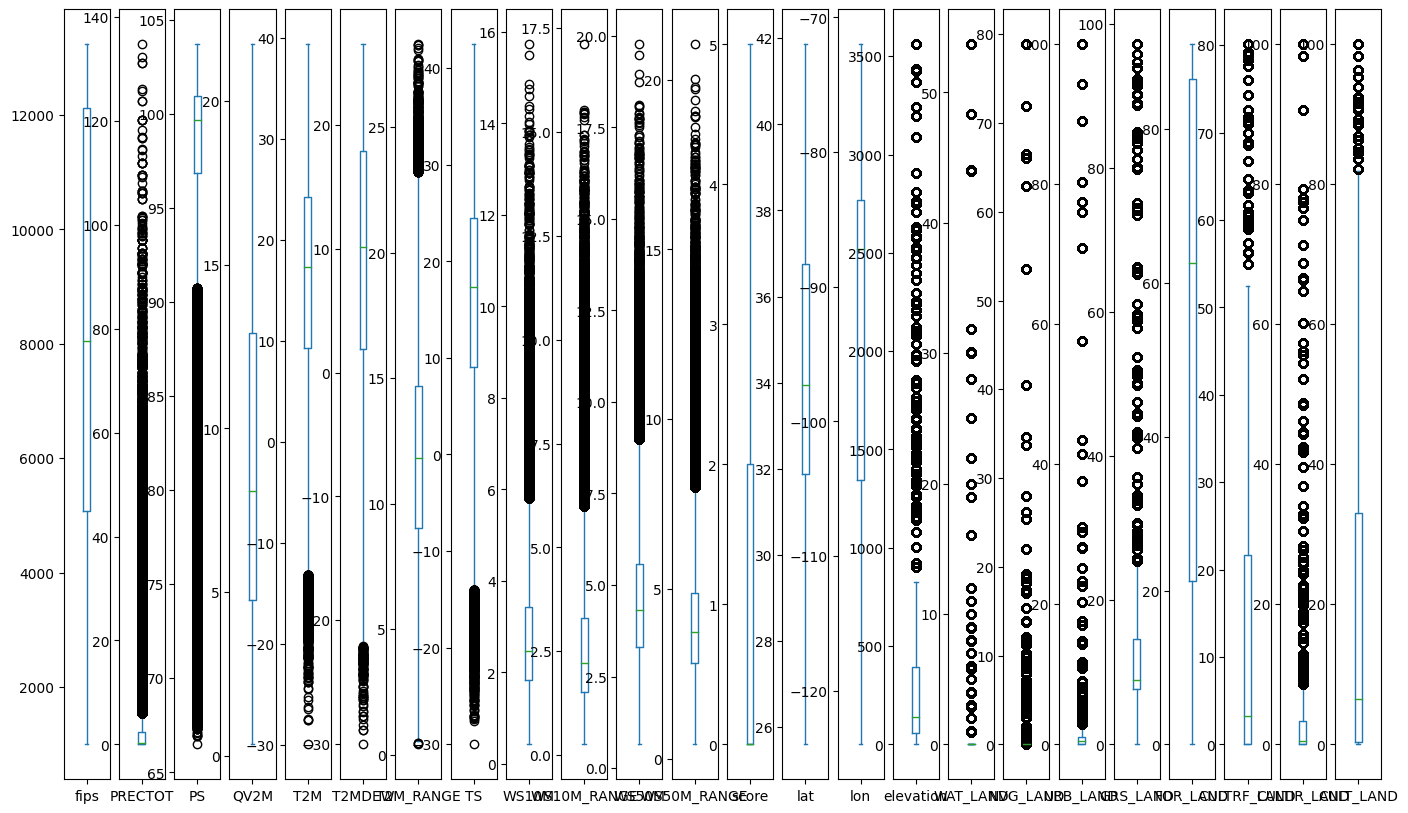

In [ ]:

for i in df.columns[2:-1]:
    #print("skewness",(np.log(df[i].skew)))
    sns.displot(np.log(df[i]))
    plt.show()

# Correlation matrix for the attributes
correlation_plot = df.corr()
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

# Dropping the columns which have highest we can see only T2MDEW and T2MWET any one can be dropped.
df=df.drop(['T2MWET'],axis=1)


# Scatter plots for selected pairs of features
sns.pairplot(df[['PRECTOT', 'PS', 'T2M', 'score']])
plt.show()

# Box plots
df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(17, 10))
plt.tight_layout()
plt.show()

In [ ]:
# We tred to make the data as Normal Distribution

In [6]:
 # Performing transformation only on significant columns
 for i in df[['PS', 'WS10M','WS10M_RANGE','WS50M']].columns:
  df[i]=np.log(df[i])

In [7]:
for i in df[['WAT_LAND','NVG_LAND','URB_LAND']].columns:
  df[i]=np.sqrt(df[i])

In [8]:
df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_RANGE    0
WS50M          0
WS50M_RANGE    0
score          0
lat            0
lon            0
elevation      0
WAT_LAND       0
NVG_LAND       0
URB_LAND       0
GRS_LAND       0
FOR_LAND       0
CULTRF_LAND    0
CULTIR_LAND    0
CULT_LAND      0
dtype: int64

# Geospatial Analysis

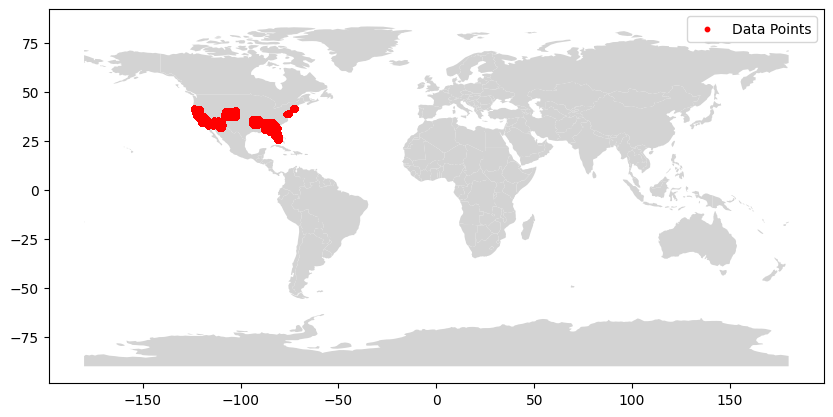

In [ ]:
# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plotting on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='red', marker='o', label='Data Points')
plt.legend()
plt.show()

# Statistical Tests

In [ ]:
X_st=df.drop(['score','date'],axis=1)
y_st=df[['score']]

X_st = sm.add_constant(X_st)  # Add a constant term for intercept
model = sm.OLS(y_st, X_st).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1733.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:33:44   Log-Likelihood:            -7.2488e+05
No. Observations:              420392   AIC:                         1.450e+06
Df Residuals:                  420368   BIC:                         1.450e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5165      0.544     -0.949      

Hypothesis for each coefficient:
Null Hypothesis (H0): The coefficient for a predictor variable is zero (no effect on the target).
Alternative Hypothesis (Ha): The coefficient is not zero (there's an effect).


Each predictor's t-statistic and associated p-value indicate its significance in predicting the target.

When dealing with regression analysis and examining the individual coefficients of predictors (independent variables), the p-values associated with each coefficient (P > |t|) are crucial in determining their significance. These p-values help in deciding whether to reject or fail to reject the null hypothesis for each individual predictor.


## Hypothesis:
## Null Hypothesis (H0): There is no linear relationship between the predictor and 'score'.
## Alternative Hypothesis (Ha): There is a linear relationship.
### P > |t| Values:

1. **P > |t| = 0 (or very close to 0)**:
   - **Inference**:
     - If the p-value for a coefficient is very close to zero (typically less than the chosen significance level, e.g., 0.05), it indicates strong evidence against the null hypothesis.
   - **Conclusion**:
     - Reject the null hypothesis for that predictor.
     - Conclude that the predictor has a statistically significant effect on the target variable ('score').

2. **P > |t| ≠ 0**:
   - **Inference**:
     - If the p-value for a coefficient is not close to zero (greater than the chosen significance level), it suggests weak evidence against the null hypothesis.
   - **Conclusion**:
     - Fail to reject the null hypothesis for that predictor.
     - Conclude that the predictor might not have a statistically significant effect on the target variable ('score').

### Interpretation:

- **Significance**:
  - Coefficients with p-values close to zero are more likely to be statistically significant in predicting the target variable.
  - Larger p-values suggest a weaker case for the predictor's significance.

- **Prediction Impact**:
  - Significant predictors (P > |t| ≈ 0) likely contribute meaningfully to predicting the 'score'.
  - Non-significant predictors (P > |t| ≠ 0) might not contribute significantly to the prediction.

- **Model Simplification**:
  - Consider removing non-significant predictors from the model if their coefficients are consistently non-significant across multiple analyses.
  - This simplification can improve model interpretability and reduce complexity without losing predictive power.

In [10]:
df_1= df[df['fips'] == 1001]

In [11]:
# Convert 'date' column to pandas datetime if it's not already in datetime format
df_1['date'] = pd.to_datetime(df_1['date'])

# Extracting month from the date column
df_1['month'] = df_1['date'].dt.month

# Creating a model with 'month' as the predictor for 'score'
X_st = df_1[['month']]  # 'month' as predictor
y_st = df_1['score']

X_st = sm.add_constant(X_st)  # Add a constant term for intercept
model = sm.OLS(y_st, X_st).fit()

# Print the summary of the regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     20.10
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           8.33e-06
Time:                        03:20:04   Log-Likelihood:                -1567.4
No. Observations:                 887   AIC:                             3139.
Df Residuals:                     885   BIC:                             3148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6965      0.102      6.837      0.0

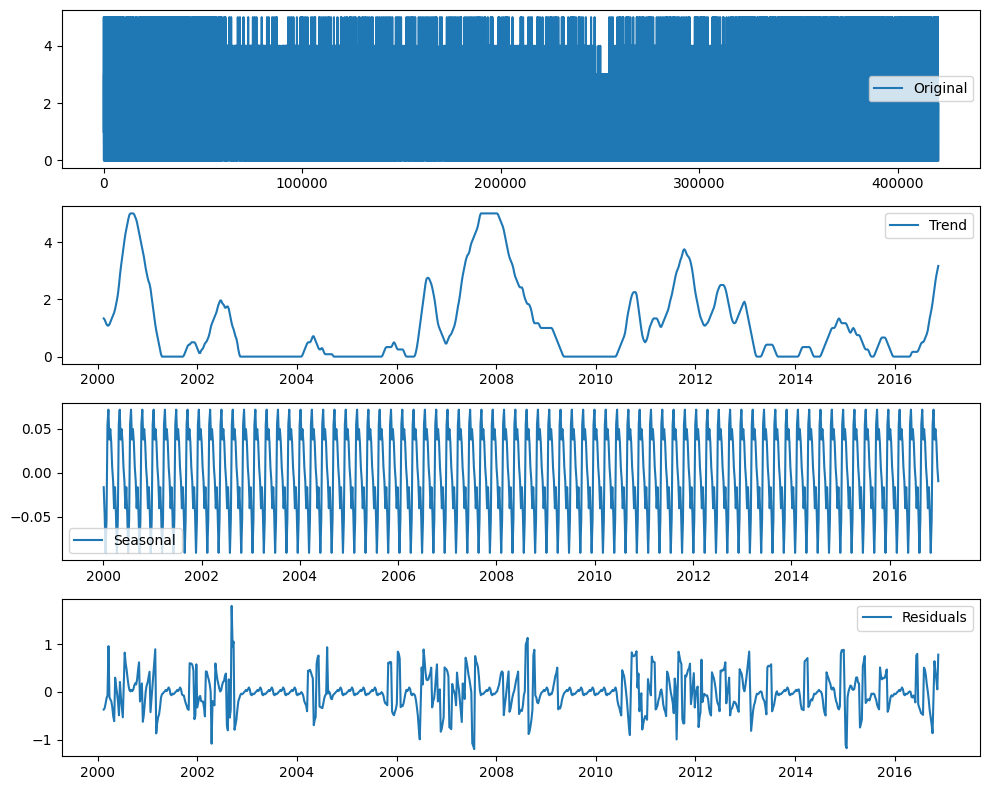

In [10]:
df_1['date'] = pd.to_datetime(df_1['date'])
df_1.set_index('date', inplace=True)

# Seasonal decomposition
decomposition = seasonal_decompose(df_1['score'], model='additive', period=12)  # Assuming monthly data (period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['score'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

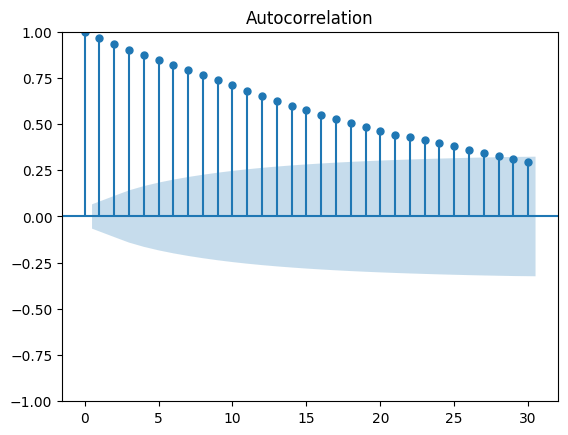

In [ ]:
# Autocorrelation plot
plot_acf(df_1['score'])
plt.show()

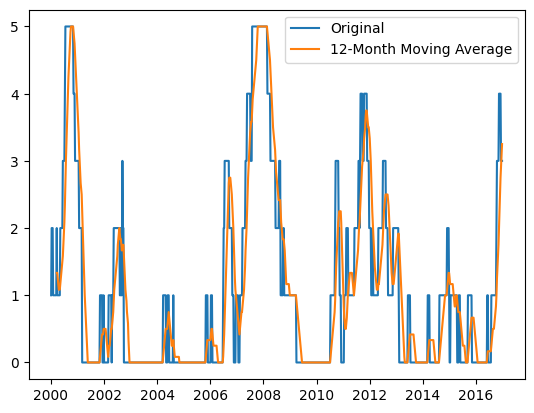

In [ ]:
# Moving average
rolling_mean = df_1['score'].rolling(window=12).mean()  # Assuming a 12-month moving average
plt.plot(df_1['score'], label='Original')
plt.plot(rolling_mean, label='12-Month Moving Average')
plt.legend()
plt.show()


# Reason For Taking only the columns with fips 1001 because we have lot of data so it cannot be visualized properly.

In [12]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the data
df['fips'] = label_encoder.fit_transform(df['fips'])

y=df['score']
X=df.drop(['score','date'],axis=1)

# Outlier Detection

In [ ]:
# Outlier Detection for a specific feature (e.g., 'score')
for i in df.columns[2:]:
    z_scores = stats.zscore(df[i])
    threshold = 3
    outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
    print(outliers)

# Outlier Detection using IQR method
for i in df.columns[2:]:
    df = df[(df[i] <= df[i].mean() + 3*df[i].std()) & (df[i] >= df[i].mean() - 3*df[i].std())]

# Feature Selection

In [ ]:

# Assuming 'score' is your target variable
'''X = df1.drop('score', axis=1)
y = df1['score']

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
#rf.fit(X, y)

# Feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
'''

"X = df1.drop('score', axis=1)\ny = df1['score']\n\n# Fit a Random Forest model\nrf = RandomForestRegressor(n_estimators=100, random_state=42)\n#rf.fit(X, y)\n\n# Feature importances\nfeature_importances = pd.Series(rf.feature_importances_, index=X.columns)\nfeature_importances_sorted = feature_importances.sort_values(ascending=False)\n"

# Class Imbalance

1.   SMOTE



In [13]:
sm = SMOTE()
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTE.shape))

After OverSampling, the shape of train_X: (1290702, 24)
After OverSampling, the shape of train_y: (1290702,) 



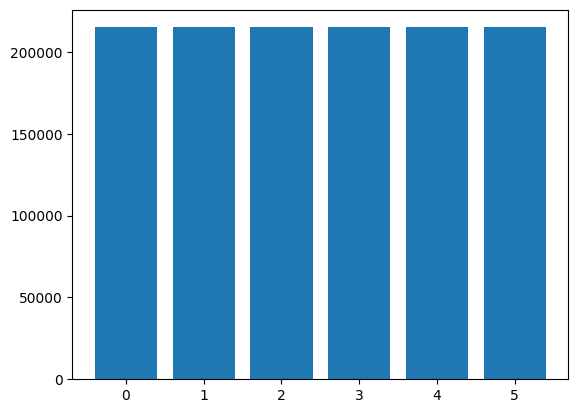

In [14]:
cc=[i for i in y_train_SMOTE.value_counts()]

plt.bar(range(0,6),height=215117)

X=X_train_SMOTE
y=y_train_SMOTE

# Scaling


In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data (calculates mean and std)
scaler.fit(X)

# Perform standard scaling on the data
scaled_data = scaler.transform(X)

print("Original data:")
print(X)
print("\nScaled data (mean=0, std=1):")
print(scaled_data)

Original data:
         fips    PRECTOT        PS       QV2M        T2M     T2MDEW  \
0           0  15.950000  4.608066   6.420000  11.400000   6.090000   
1           0   1.330000  4.609162   6.630000  11.480000   7.840000   
2           0   1.110000  4.609063   9.530000  14.280000  13.260000   
3           0   0.000000  4.606270   2.050000  -0.780000  -7.930000   
4           0   0.000000  4.615121   3.360000   2.060000  -1.730000   
...       ...        ...       ...        ...        ...        ...   
1290697   297   3.220927  4.618713   9.204732  14.296024  12.184717   
1290698    18   0.000000  4.612689   4.455413   9.499537   2.137189   
1290699   453   0.959906  4.602650  11.832213  22.004732  16.460045   
1290700   388   0.005111  4.593524   8.628209  20.517527  11.513534   
1290701    35   0.020380  4.582897   8.152878  23.240520  10.245705   

            T2MWET  T2M_RANGE         TS     WS10M  ...        lon  elevation  \
0         6.100000  15.920000  11.310000  1.345472 

# Random Forest Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf_classifier.fit(X_train,y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

y_pred=rf_classifier.predict(X_test)

# inverse transform

original_data = scaler.inverse_transform(X)

rf_classifier.score(X_test,y_test)

file = open('base_RF.pkl', 'wb')
pickle.dump(rf_classifier, file)
file.close()


"""file = open('fips_encoder.pkl', 'wb')
pickle.dump(label_encoder, file)
file.close()"""

#fips_encoder = pickle.load(open('fips_encoder.pkl', 'rb'))

tt=X.iloc[0].values

model = pickle.load(open('base_RF.pkl','rb'))
prediction = model.predict([tt])
x=X[X['fips']==0]



# Hyperparameter Tuning


In [ ]:
'''from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Generate some random regression data for demonstration purpos

# Initialize the Random Forest regressor
reg = RandomForestRegressor(random_state=99)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

model=model.fit(X_train,y_train)'''

# Results (Classification Report)


In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# LSTM Univariate Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 60)                3060      
                                                                 
Total params: 33660 (131.48 KB)
Trainable params: 33660 (131.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
21/21 [==============================] - 9s 172ms/step - loss: 2.6987 - val_loss: 0.6977
Epoch 2/50
21/21 [==============================] - 2s 93ms/step - loss: 1.9697 - val_loss: 0.6658
Epoch 3/50
21/21 [==============================] - 2s 94ms/step - loss: 1.690

<Axes: xlabel='date'>

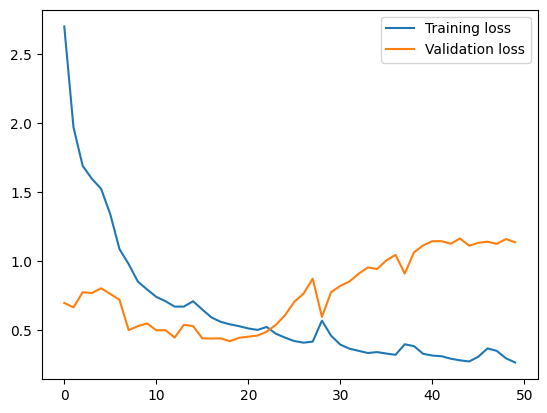

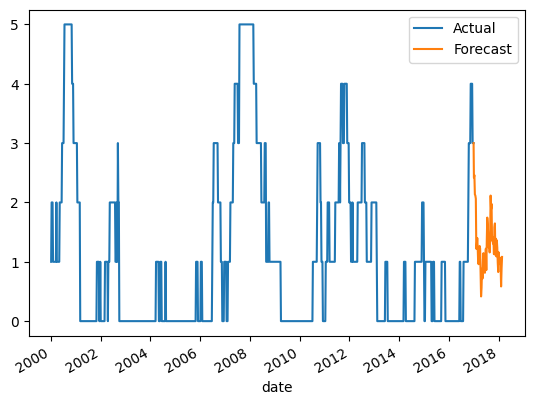

In [17]:
# LSTM is a special Kind of RNN, designed to avoid the long term dependency problem and vanishing gradient problem.
# Dense is to create Hidden Layers, LSTM Model is used for forecasting time series data.
# what ever be the Neural Network we must import Sequential

pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# Reading data from csv file & converting it into dataFrame
df=pd.read_csv("/content/drive/MyDrive/drought_soil.csv")

def nn(x):
    if(x>=0 and x<=0.5):
        return 0
    elif(x>0.5 and x<=1.5):
        return 1
    elif(x>1.5 and x<=2.5):
        return 2
    elif(x>2.5 and x<=3.5):
        return 3
    elif(x>3.5 and x<=4.5):
        return 4
    elif(x>4.5 and x<=5.5):
        return 5
    else:
        return x
df['score']=df['score'].apply(nn)
df_1 = df[df['fips']==1001]

df_1 = df_1.drop('Unnamed: 0',axis=1)

y = df_1['score']
y = y.values.reshape(-1, 1)



# generate the input and output sequences

n_lookback = 100
#length of input sequences/number of data points are to be used to predict the next sequence.

n_forecast = 60
#length of output sequences/numbers of points to be predicted using the look_back

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    # Dividing the Data into Sequences (Here, 4) of data
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# Fitting the model
model = Sequential()
# Adding the Neural Network Layers with LSTM

model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1),
               activation='tanh', recurrent_activation='sigmoid',kernel_initializer='glorot_uniform'))
# units is to add the number of neurons 50(here), it is known by using hyperparameter Optimizing techniques
# Return Sequences is whether to return the entire sequence with output or the single output. By default, it is False
# Input_shape - is the size of the input that we provide
# Activation Function - Tanh
# Recurrent Activation Function - Sigmoid
# Kernel_initializer is to initialize the weights for the input.
# Uniform distribution (or) Glorot distribution works well with the Sigmoid and Tanh Functions.



model.add(LSTM(units=50))
# Adding 50 Neurons for the second layer

model.add(Dense(n_forecast))


model.compile(loss='mean_squared_error', optimizer='adam')
# Loss Function is Mean Squared Error Bec the Data is Continuous, for categorical data, we can use loss = 'binary_crossentropy'
# Optimizers are Stochastic Gradient Descent(SGD), AdaDelta , AdaGrad, RMSPROP, adam
# Optimizers are used to decrease the Loss function

print(model.summary())

history=model.fit(X, Y, epochs=50, batch_size=32, verbose=1,validation_split=0.1)
# Verbose = 1 to Display the Training of the model for every epoch, we can use verbose = 0 to not to display anything.

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
#Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df_1[['date','score']]
df_past.rename(columns={'score': 'Actual'}, inplace=True)
df_past['date'] = pd.to_datetime(df_past['date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['date', 'Actual', 'Forecast'])
df_future['date'] = pd.date_range(start=df_past['date'].iloc[-1] + pd.Timedelta(1,"d"), periods=n_forecast,freq='1W')
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('date')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
results.plot()

In [18]:
# Evaluate the model
eval_loss = model.evaluate(X, Y, verbose=1)
print("Evaluation of Uni-variate LSTM :", eval_loss)


23/23 [==============================] - 1s 26ms/step - loss: 0.3501
Evaluation of Uni-variate LSTM : 0.35008010268211365


# LSTM Multivariate Analysis

trainX shape == (578, 250, 4).
trainY shape == (578, 1).
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 250, 64)           17664     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30113 (117.63 KB)
Trainable params: 30113 (117.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
33/33 [==============================] - 12s 292ms/step - loss: 1.2752 - val_los

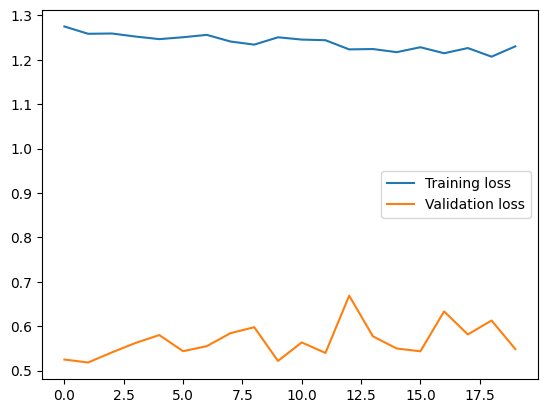

In [19]:
df=pd.read_csv("/content/drive/MyDrive/drought_soil.csv")
df=df.dropna()
m1=1001
m2=5141
m3=8021
m4=6853
m5=12097
m6=13191
df=df[df['fips']==m2]

dateofpred = 2020-10-15

#Separate dates for future plotting
train_dates = pd.to_datetime(df['date'])


cols =df.columns
cols=['PRECTOT','WS50M_RANGE','NVG_LAND','score']


df_for_training = df[cols]
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

trainX = []
trainY = []

n_future = 60   # Number of days we want to look into the future based on the past days.
n_past = 250

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))

print('trainY shape == {}.'.format(trainY.shape))
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

# fit the model
history = model.fit(trainX, trainY, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Enter the Date till which you need prediction in format of ex: 2023-01-01
 2020-10-15
7/7 [==============================] - 0s 51ms/step


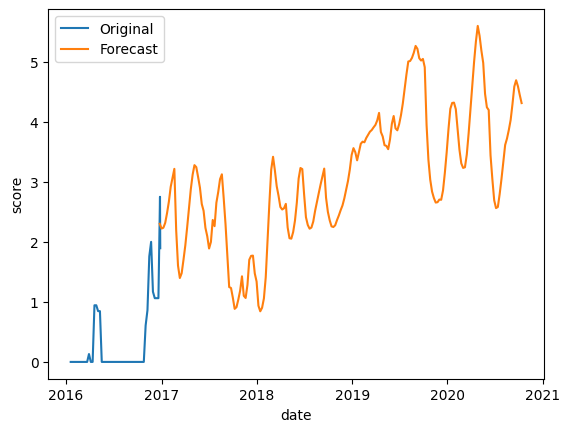

The drought score for the given date is  [4.3111024]


In [22]:
s=dateofpred

n_past = 50
n_days_for_prediction=7  #let us predict past 7 days
pred_days = 5
predict_period_dates=pd.date_range(start ='2016-12-24', end=s, freq ='1W')
n_days_for_prediction=len(predict_period_dates)
prediction = model.predict(trainX[-n_days_for_prediction:])
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)

y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'score':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])


original = df[['date', 'score']]

original.loc[len(original.index)] = ['2016-12-26',2.75]

original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2016-1-19']

sns.lineplot(x=original['date'], y=original['score'], label='Original')

# Plot the forecast data
sns.lineplot(x=df_forecast['date'], y=df_forecast['score'], label='Forecast')

# Show the legend
plt.legend()

# Show the plot
plt.show()
print("The drought score for the given date is ",df_forecast['score'].values[-1:])

# Evalution


In [23]:
eval_loss1 = model.evaluate(trainX[-pred_days:],trainY[-pred_days:],verbose=1)

1/1 [==============================] - 0s 137ms/step - loss: 0.2639


In [24]:
print("Evaluation of Multi-variate LSTM :", eval_loss1)

Evaluation of Multi-variate LSTM : 0.26389986276626587
